<img style="float: left;" src="images/SWAP_Logo.png" alt="UoE" height="50px" width="1050px"/>

In [1]:
# Initial set-up
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import FloatSlider, IntSlider, HBox
from IPython.display import HTML, display

from src.pminterface import pminterface
from src import Model
print ("You are now ready to continue the practical")

You are now ready to continue the practical


## INTRODUCTION
<br>
Penman-Monteith Equation
<br>
$ \Large LE = \frac{\Delta R_n + \frac{\rho c_p (e_z - e_s)}{r_a}}{\Delta + \gamma(1+\frac{r_c}{r_a})}$
<br>  
where:  
<br>
$ \large R_n$ = net radiation (W m$^{-2}$)
<br>
$\large \Delta$ = slope of saturation vapor pressure curve (hPa$\, ^{\circ}$C$^{-1}$)
<br>
$\large \rho$ = density of air (kg m$^{-3}$)
<br>
$\large c_p$ = specific heat of air (j kg$^{-1}$ $^{\circ}$C$^{-1}$)
<br>
$\large e_z$ = vapour pressure in air (hPa) at height $z$
<br>
$\large e_s$ = vapour pressure at surface (hPa)
<br>
$\large r_a$ = aerodynamic resistance (s m$^{-1}$)
<br>
$\large r_c$ = canopy resistance or bulk stomatal resistance (s m$^{-1}$)
<br>
$\large \gamma$ = pyschrometric constant (0.066 hPa $^{\circ}$C$^{-1}$)
<br>

Start by defining a simple function just to test the simulation is available and working. The parameters are:
- $irradiance:$ irradiance
- $air T:$ air temperature
- $u:$ windspeed
- $vp:$ vapour pressure
- $r_c:$ canopy resistance

In [2]:
def update_plot(sol,airt,u,vp,rs):
    # calculate evaporation, simple defaults
    # inputs are irrad, airT, u, vp, rs
    LE = mod.calculateLE(sol,1,airt,u,vp,rs)
    LEc = mod.calculateLE(500,1,15,3,8,30)
    y = [LEc, LE]
    x = range( len(y) )
    print('Control = {:03.0f}'.format(y[0]), 'W m$^{-2}$', '   Modelled = {:03.0f}'.format(y[1]), 'W m$^{-2}$')
    plt.suptitle('Penman-Monteith Evaporation')
    plt.bar( x, y, color="blue" )
    plt.ylim(0,1000)
    ax.set_ylabel('Evaporation Flux Density (W m$^{-2}$)')
    xTickMarks = ['Control','Model']
    xtickNames = ax.set_xticklabels(xTickMarks)
    plt.setp(xtickNames, rotation=45, fontsize=10)
    plt.show()
    


$\Large R_n=(1-\alpha)Q_t + L_w^{\downarrow} \,+L_w^{\uparrow} = H + LE + G$

In [3]:
# Create some selection boxes
fd = pminterface()             # the view Class in MVC parlance effectively
widgets.VBox(children=[fd.h1,fd.h2])

414.2885575999294
432.0339315091668
447.26486485478665
434.93907823994726
382.266336985704
340.9732118946392
307.7314813890046
340.9732118946392
382.266336985704
434.93907823994726
504.4472052976024
600.3974260609604
741.4223730186084
824.4122120294134
907.8307556046154
991.5678199594703
907.8307556046154
824.4122120294134
741.4223730186084
658.97312734206
656.0403795492804
652.7817708906362
649.5231622319919
646.2645535733477
649.5231622319919
652.7817708906362
656.0403795492804


In [4]:
print(fd.surface)
mod = Model.Model(fd.surface)

{'wind': 8, 'solar': 491, 'albedo': 0.35, 'airt': 14, 'sfc': 'grass', 'rs': 6, 'vp': 10}


Now plot saturation vapour pressure as a function of air temperature

<IPython.core.display.Javascript object>


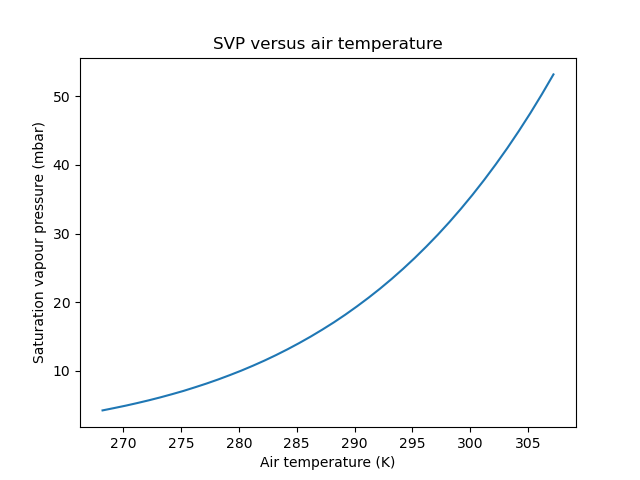

In [5]:
fig = plt.figure()
ax2 = fig.add_subplot(111)
d = fd.svpData
x_list = [x for [x, y] in d]
y_list = [y for [x, y] in d]
ax2.set_xlabel('Air temperature (K)')
ax2.set_ylabel('Saturation vapour pressure (mbar)')
ax2.set_title('SVP versus air temperature')
plt.plot(x_list, y_list)
# Make it interactive with Bokeh
#show(bokeh.mpl.to_bokeh())

In [ ]:
print(s.rho)

In [ ]:
def show_change(change):
    display(change)
 
int_slider = widgets.IntSlider(value=7, min=0, max=10, continuous_update=False)
int_slider.observe(show_change, 'value')
int_slider.value = 8

In [ ]:
print(int_slider.value)

In [ ]:
display(int_slider)

In [ ]:
print(int_slider.value)